## KAPARAPU ABHICHAND - CE17B104

Starting by importing all the necessary libraries

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

Let's import the dataset and read it as pandas dataframe


In [164]:
df=pd.read_csv("train_data_iitm.csv")
df

,UID,part_serial_no,type,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,Type_1_failure,Type_2_failure,Type_3_failure,Type_4_failure,Type_5_failure
0,12695,M17554,M,300.1,309.6,1625,38.0,46,0,0,0,0,0,0
1,15141,M20000,M,304.3,313.6,1585,32.1,202,0,0,0,0,0,0
2,12569,L49748,L,299.6,309.2,1450,43.1,160,0,0,0,0,0,0
3,13672,M18531,M,302.3,311.7,1486,39.6,147,0,0,0,0,0,0
4,17428,L54607,L,300.0,311.4,1634,31.9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,12896,M17755,M,300.7,309.6,1473,48.1,87,0,0,0,0,0,0
7996,17814,L54993,L,300.0,311.5,1455,41.7,130,0,0,0,0,0,0
7997,10906,L48085,L,295.6,306.1,1474,41.2,156,0,0,0,0,0,0
7998,15193,L52372,L,303.9,313.1,1310,62.9,130,0,0,0,0,0,0


## Data Preprocessing

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UID                   8000 non-null   int64  
 1   part_serial_no        8000 non-null   object 
 2   type                  8000 non-null   object 
 3    ambient_temperature  8000 non-null   float64
 4   process_temperature   8000 non-null   float64
 5   rotational_speed      8000 non-null   int64  
 6   torque                8000 non-null   float64
 7   tool_wear             8000 non-null   int64  
 8   machine_failure       8000 non-null   int64  
 9   Type_1_failure        8000 non-null   int64  
 10  Type_2_failure        8000 non-null   int64  
 11  Type_3_failure        8000 non-null   int64  
 12  Type_4_failure        8000 non-null   int64  
 13  Type_5_failure        8000 non-null   int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 875.1+ KB


In [166]:
df.describe()

,UID,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,Type_1_failure,Type_2_failure,Type_3_failure,Type_4_failure,Type_5_failure
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,15018.443500,300.008637,310.009538,1539.066000,39.962725,107.890375,0.034500,0.004875,0.012000,0.009125,0.010000,0.001625
std,2885.300752,2.002711,1.482766,178.707689,9.967380,63.880266,0.182521,0.069655,0.108892,0.095094,0.099505,0.040281
min,10001.000000,295.300000,305.700000,1181.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12532.750000,298.300000,308.800000,1423.000000,33.100000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15026.500000,300.100000,310.100000,1504.000000,40.000000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17518.500000,301.500000,311.100000,1614.000000,46.800000,163.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,20000.000000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [167]:
df.isnull().sum()

UID                     0
part_serial_no          0
type                    0
 ambient_temperature    0
process_temperature     0
rotational_speed        0
torque                  0
tool_wear               0
machine_failure         0
Type_1_failure          0
Type_2_failure          0
Type_3_failure          0
Type_4_failure          0
Type_5_failure          0
dtype: int64

Luckily, there are no NaN values. Hence this has reduced our work because if there are any NaN values, we need to replace them with either mean,mode,median or drop those rows based on the data.

##### Deleting the UID and Serial No columns as they do not have any importance in our prediction

In [168]:
df.drop({'UID','part_serial_no'},axis=1,inplace = True)
df

,type,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,Type_1_failure,Type_2_failure,Type_3_failure,Type_4_failure,Type_5_failure
0,M,300.1,309.6,1625,38.0,46,0,0,0,0,0,0
1,M,304.3,313.6,1585,32.1,202,0,0,0,0,0,0
2,L,299.6,309.2,1450,43.1,160,0,0,0,0,0,0
3,M,302.3,311.7,1486,39.6,147,0,0,0,0,0,0
4,L,300.0,311.4,1634,31.9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,M,300.7,309.6,1473,48.1,87,0,0,0,0,0,0
7996,L,300.0,311.5,1455,41.7,130,0,0,0,0,0,0
7997,L,295.6,306.1,1474,41.2,156,0,0,0,0,0,0
7998,L,303.9,313.1,1310,62.9,130,0,0,0,0,0,0


## Exploratory data analysis.

Let's find the correlation between each columns through a heatmap

<AxesSubplot:>

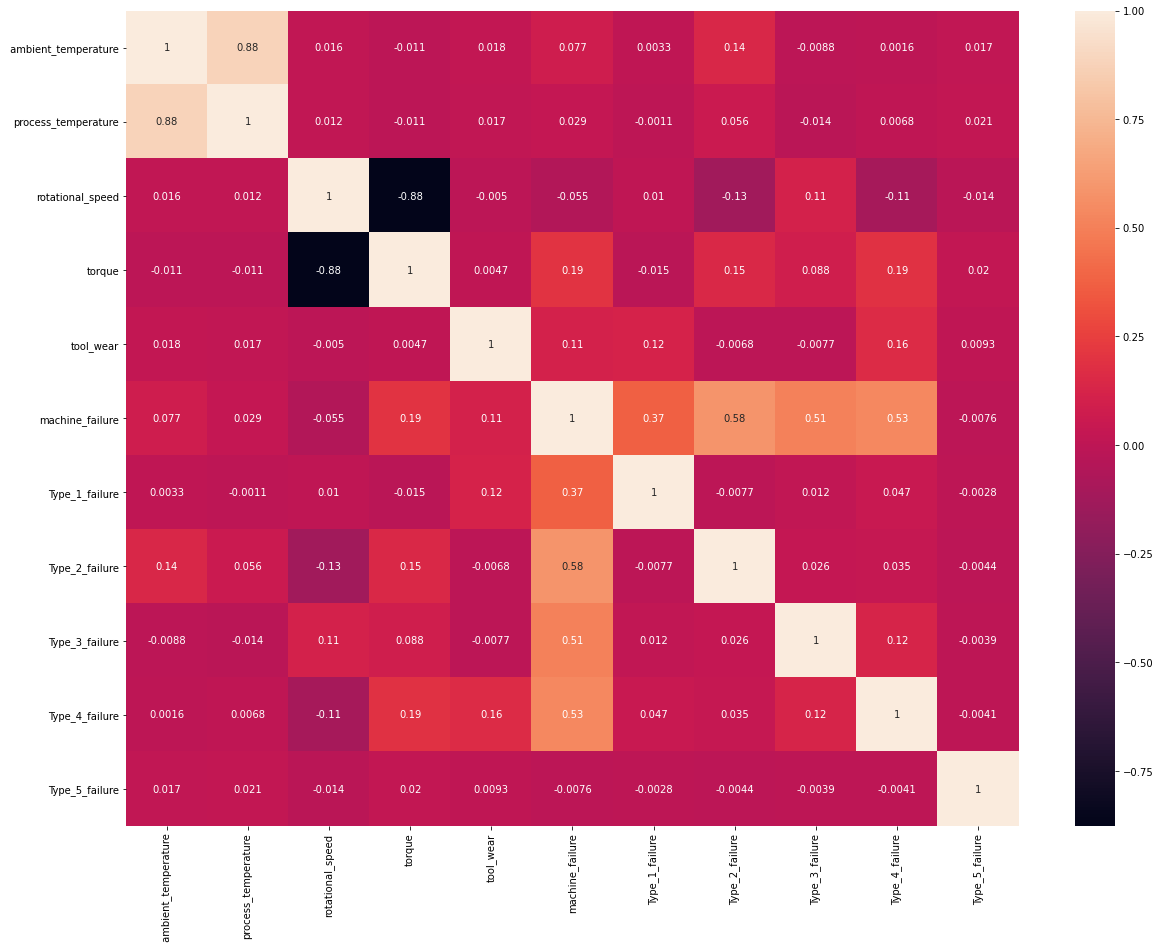

In [169]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

<AxesSubplot:ylabel='type'>

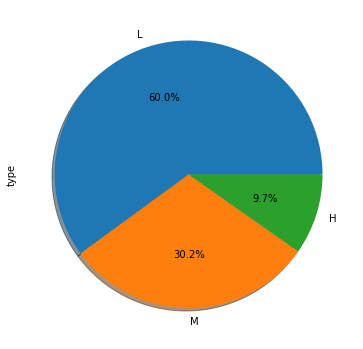

In [170]:
df['type'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8))

 there are 60% of low quality varients, 30.2% of medium quality, 9.7% high quality varients to be precise.

##### Scaling

In [171]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [172]:
scaling_columns=[' ambient_temperature','process_temperature','rotational_speed','torque','tool_wear']

In [173]:
x = df.drop({'machine_failure','Type_1_failure','Type_2_failure','Type_3_failure','Type_4_failure','Type_5_failure'}, axis= 1)

In [174]:
x

,type,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear
0,M,300.1,309.6,1625,38.0,46
1,M,304.3,313.6,1585,32.1,202
2,L,299.6,309.2,1450,43.1,160
3,M,302.3,311.7,1486,39.6,147
4,L,300.0,311.4,1634,31.9,0
...,...,...,...,...,...,...
7995,M,300.7,309.6,1473,48.1,87
7996,L,300.0,311.5,1455,41.7,130
7997,L,295.6,306.1,1474,41.2,156
7998,L,303.9,313.1,1310,62.9,130


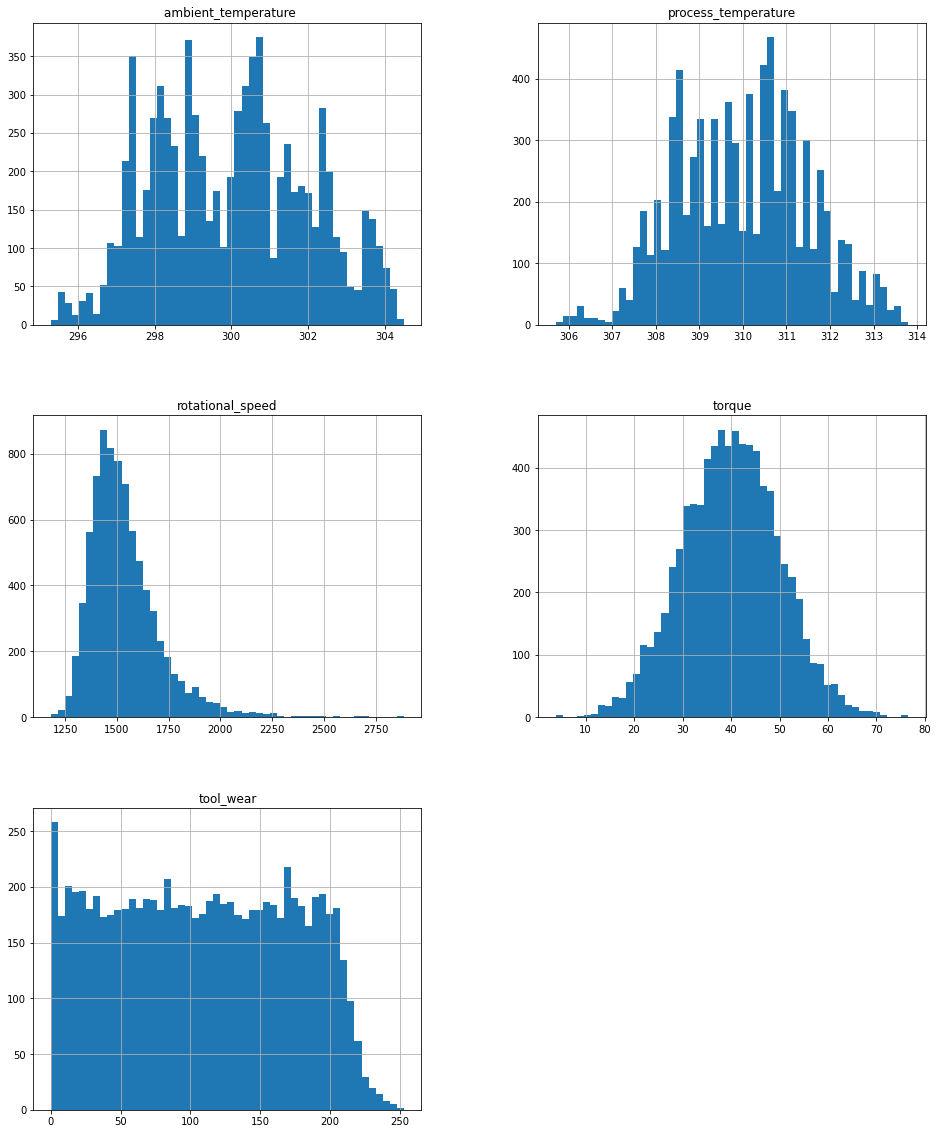

In [175]:
x.hist(figsize=(16, 20), bins=50, xlabelsize=10, ylabelsize=10); # ; avoid having the matplotlib verbose informations

In [176]:
x[scaling_columns].describe().loc[['min', 'max']]

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear
min,295.3,305.7,1181.0,3.8,0.0
max,304.5,313.8,2886.0,76.6,253.0


In [177]:
scaler.fit(x[scaling_columns])

MinMaxScaler()

In [178]:
x[scaling_columns] = scaler.transform(x[scaling_columns])

In [179]:
x[scaling_columns].describe().loc[['min', 'max']]

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


In [180]:
x=pd.get_dummies(x, columns = ['type'])

In [181]:
x

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M
0,0.521739,0.481481,0.260411,0.469780,0.181818,0,0,1
1,0.978261,0.975309,0.236950,0.388736,0.798419,0,0,1
2,0.467391,0.432099,0.157771,0.539835,0.632411,0,1,0
3,0.760870,0.740741,0.178886,0.491758,0.581028,0,0,1
4,0.510870,0.703704,0.265689,0.385989,0.000000,0,1,0
...,...,...,...,...,...,...,...,...
7995,0.586957,0.481481,0.171261,0.608516,0.343874,0,0,1
7996,0.510870,0.716049,0.160704,0.520604,0.513834,0,1,0
7997,0.032609,0.049383,0.171848,0.513736,0.616601,0,1,0
7998,0.934783,0.913580,0.075660,0.811813,0.513834,0,1,0


In [182]:
y=df['machine_failure']

In [183]:
y.value_counts()

0    7724
1     276
Name: machine_failure, dtype: int64

In [184]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.10, 
                                                random_state=10)

In [185]:
model_list = []
score_list = []

## PREDICTING THROUGH VARIOUS ALGORITHMS

### LOGISTIC REGRESSION

In [186]:
model1 = LogisticRegression()
model1.fit(xtrain, ytrain)


LogisticRegression()

In [187]:
score1 = accuracy_score(ytest, model1.predict(xtest))
print("Model : Logistics Regression")
print('Accuracy : {:0.2f}'.format(score1))
model_list.append('Logistic_Regression')
score_list.append(score1)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model1.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model1.predict(xtest))))

Model : Logistics Regression
Accuracy : 0.96
Recall_Score : 0.00
precission_Score : 0.00


<AxesSubplot:>

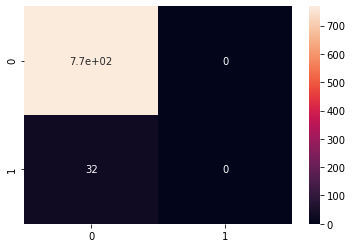

In [188]:
cm= confusion_matrix(ytest, model1.predict(xtest)) 
sns.heatmap(cm, annot=True)

### DECISION TREE CLASSIFIER

In [189]:
model2 = DecisionTreeClassifier()
model2.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [190]:
score2 = accuracy_score(ytest, model2.predict(xtest))
print("Model : DecisionTreeClassifier ")
print('Accuracy : {:0.2f}'.format(score2))
model_list.append('DecisionTreeClassifier')
score_list.append(score2)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model2.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model2.predict(xtest))))

Model : DecisionTreeClassifier 
Accuracy : 0.98
Recall_Score : 0.78
precission_Score : 0.74


<AxesSubplot:>

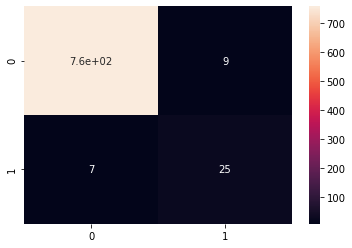

In [191]:
cm= confusion_matrix(ytest, model2.predict(xtest)) 
sns.heatmap(cm, annot=True)

### RANDOM FOREST

In [192]:
model3=RandomForestClassifier()
model3.fit(xtrain,ytrain)

RandomForestClassifier()

In [193]:
score3 = accuracy_score(ytest, model3.predict(xtest))
print("Model : RandomForestClassifier ")
print('Accuracy : {:0.2f}'.format(score3))
model_list.append('RandomForestClassifier')
score_list.append(score3)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model3.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model3.predict(xtest))))

Model : RandomForestClassifier 
Accuracy : 0.98
Recall_Score : 0.59
precission_Score : 0.90


<AxesSubplot:>

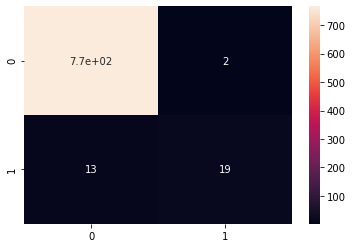

In [194]:
cm= confusion_matrix(ytest, model3.predict(xtest)) 
sns.heatmap(cm, annot=True)

### SUPPORT VECTOR MACHINE ALGORITHM

In [195]:
model4 = SVC(kernel = 'linear', random_state = 0)
model4.fit(xtrain, ytrain)

SVC(kernel='linear', random_state=0)

In [196]:
score4 = accuracy_score(ytest, model4.predict(xtest))
print("Model : SVM ")
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('SVM')
score_list.append(score4)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model4.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model4.predict(xtest))))

Model : SVM 
Accuracy : 0.96
Recall_Score : 0.00
precission_Score : 0.00


<AxesSubplot:>

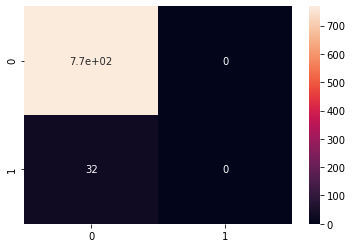

In [197]:
cm= confusion_matrix(ytest, model4.predict(xtest)) 
sns.heatmap(cm, annot=True)

### K-NN CLASSIFIER

In [198]:
model5= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model5.fit(xtrain, ytrain)  

KNeighborsClassifier()

In [199]:
score5 = accuracy_score(ytest, model5.predict(xtest))
print("Model : K-NN")
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('K-NN')
score_list.append(score5)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model5.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model5.predict(xtest))))

Model : K-NN
Accuracy : 0.97
Recall_Score : 0.25
precission_Score : 0.80


<AxesSubplot:>

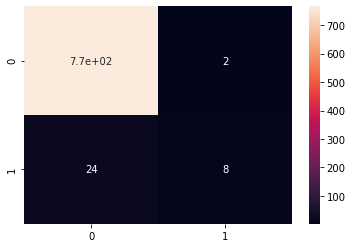

In [200]:
cm= confusion_matrix(ytest, model5.predict(xtest)) 
sns.heatmap(cm, annot=True)

5 out of 40 are predicted wrong using K-NN algorithm

### NAIVE BAYES

In [201]:
model6 = GaussianNB()  
model6.fit(xtrain, ytrain)  


GaussianNB()

In [202]:
score6 = accuracy_score(ytest, model6.predict(xtest))
print("Model : Naive bayes")
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('Naive-Bayes')
score_list.append(score6)
print('Recall_Score : {:0.2f}'.format(recall_score(ytest, model6.predict(xtest))))
print('precission_Score : {:0.2f}'.format(precision_score(ytest, model6.predict(xtest))))

Model : Naive bayes
Accuracy : 0.96
Recall_Score : 0.12
precission_Score : 0.36


<AxesSubplot:>

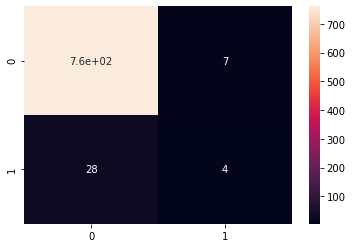

In [203]:
cm= confusion_matrix(ytest, model6.predict(xtest)) 
sns.heatmap(cm, annot=True)

<AxesSubplot:>

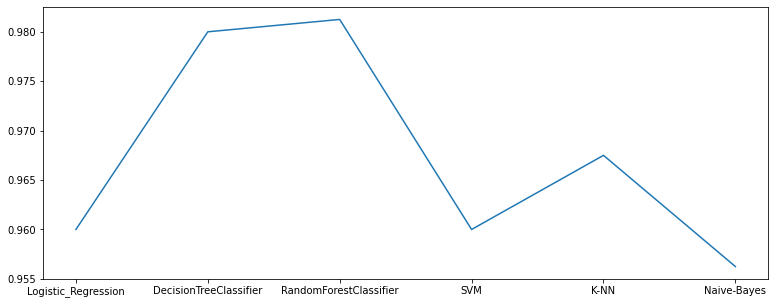

In [204]:
plt.figure(figsize=(13, 5))
sns.lineplot(model_list, score_list)

In [205]:
score_list

[0.96, 0.98, 0.98125, 0.96, 0.9675, 0.95625]

In [296]:
train_score = accuracy_score(ytrain, model3.predict(xtrain))
train_score

1.0

In [206]:
model_list

['Logistic_Regression',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'SVM',
 'K-NN',
 'Naive-Bayes']

<AxesSubplot:>

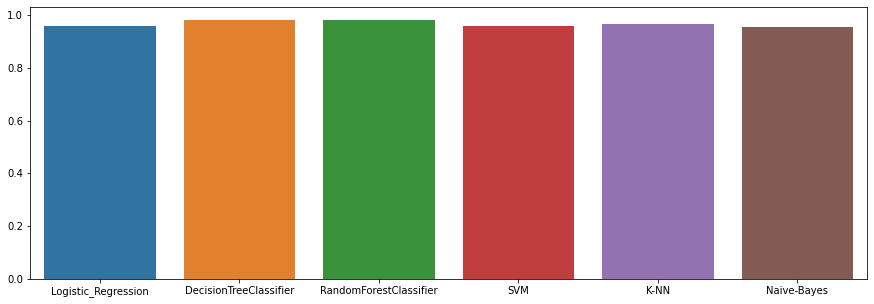

In [210]:
plt.figure(figsize=(15, 5))
sns.barplot(model_list, score_list)

In [211]:
df

,type,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,Type_1_failure,Type_2_failure,Type_3_failure,Type_4_failure,Type_5_failure
0,M,300.1,309.6,1625,38.0,46,0,0,0,0,0,0
1,M,304.3,313.6,1585,32.1,202,0,0,0,0,0,0
2,L,299.6,309.2,1450,43.1,160,0,0,0,0,0,0
3,M,302.3,311.7,1486,39.6,147,0,0,0,0,0,0
4,L,300.0,311.4,1634,31.9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7995,M,300.7,309.6,1473,48.1,87,0,0,0,0,0,0
7996,L,300.0,311.5,1455,41.7,130,0,0,0,0,0,0
7997,L,295.6,306.1,1474,41.2,156,0,0,0,0,0,0
7998,L,303.9,313.1,1310,62.9,130,0,0,0,0,0,0


In [212]:
df1=df.drop(index=df[df['machine_failure']==0].index)

In [213]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 13 to 7992
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  276 non-null    object 
 1    ambient_temperature  276 non-null    float64
 2   process_temperature   276 non-null    float64
 3   rotational_speed      276 non-null    int64  
 4   torque                276 non-null    float64
 5   tool_wear             276 non-null    int64  
 6   machine_failure       276 non-null    int64  
 7   Type_1_failure        276 non-null    int64  
 8   Type_2_failure        276 non-null    int64  
 9   Type_3_failure        276 non-null    int64  
 10  Type_4_failure        276 non-null    int64  
 11  Type_5_failure        276 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 28.0+ KB


<AxesSubplot:>

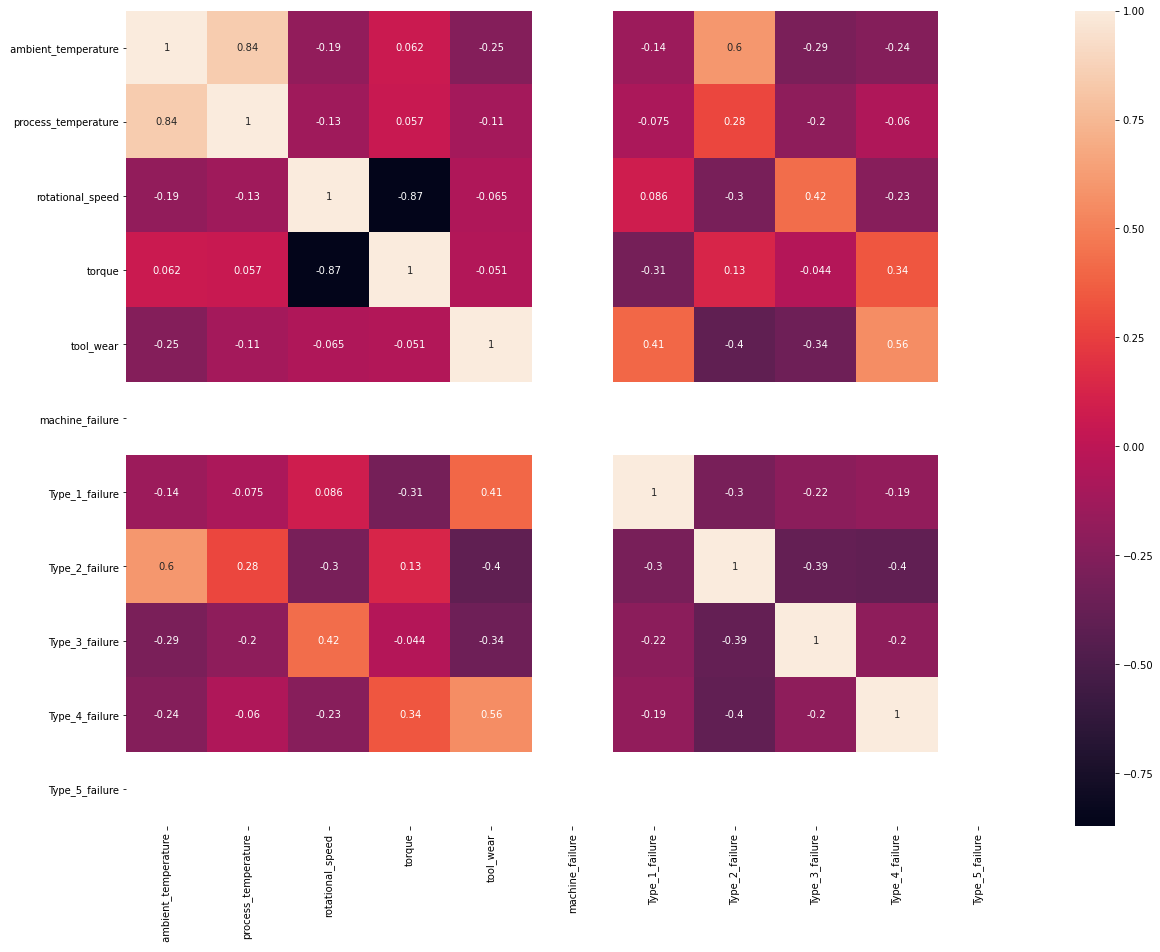

In [214]:
plt.subplots(figsize=(20,15))
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:ylabel='type'>

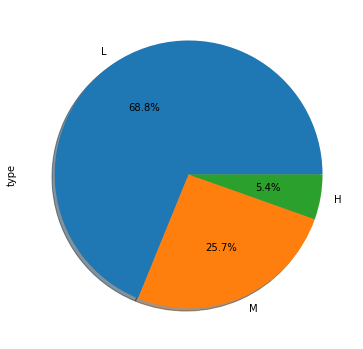

In [216]:
df1['type'].value_counts().plot.pie(autopct = '%1.1f%%', shadow= True, figsize = (6, 8))

 there are 60% of low quality varients, 30.2% of medium quality, 9.7% high quality varients to be precise.

In [217]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [218]:
scaling_columns1=[' ambient_temperature','process_temperature','rotational_speed','torque','tool_wear']

In [220]:
x1 = df1.drop({'machine_failure','Type_1_failure','Type_2_failure','Type_3_failure','Type_4_failure','Type_5_failure'}, axis= 1)

In [221]:
x1

,type,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear
13,H,296.6,307.7,1386,62.3,100
33,L,296.9,307.8,1400,57.1,202
85,L,302.3,310.1,1353,50.9,36
99,L,302.6,310.4,1365,66.8,80
110,L,300.3,310.3,1362,60.3,206
...,...,...,...,...,...,...
7906,L,298.5,309.5,1294,66.7,12
7917,H,302.7,310.8,1275,55.0,25
7938,M,302.4,310.1,1358,54.6,61
7948,M,299.3,308.4,1542,37.5,203


In [222]:
x1[scaling_columns1].describe().loc[['min', 'max']]

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear
min,295.6,306.1,1181.0,3.8,0.0
max,304.4,313.7,2886.0,76.6,253.0


In [223]:
scaler.fit(x1[scaling_columns1])

MinMaxScaler()

In [224]:
x1[scaling_columns1] = scaler.transform(x1[scaling_columns1])

In [225]:
x[scaling_columns1].describe().loc[['min', 'max']]

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear
min,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0


In [226]:
x1=pd.get_dummies(x1, columns = ['type'])

In [227]:
x1

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M
13,0.113636,0.210526,0.120235,0.803571,0.395257,1,0,0
33,0.147727,0.223684,0.128446,0.732143,0.798419,0,1,0
85,0.761364,0.526316,0.100880,0.646978,0.142292,0,1,0
99,0.795455,0.565789,0.107918,0.865385,0.316206,0,1,0
110,0.534091,0.552632,0.106158,0.776099,0.814229,0,1,0
...,...,...,...,...,...,...,...,...
7906,0.329545,0.447368,0.066276,0.864011,0.047431,0,1,0
7917,0.806818,0.618421,0.055132,0.703297,0.098814,1,0,0
7938,0.772727,0.526316,0.103812,0.697802,0.241107,0,0,1
7948,0.420455,0.302632,0.211730,0.462912,0.802372,0,0,1


Predicting the type of failure in the case of a machine failure

In [228]:
y1=df1['Type_1_failure']
y2=df1['Type_2_failure']
y3=df1['Type_3_failure']
y4=df1['Type_4_failure']
y5=df1['Type_5_failure']

In [229]:
x1train, x1test, y1train, y1test = train_test_split(x1, y1,test_size=0.10,random_state=10)
x1train, x1test, y2train, y2test = train_test_split(x1, y2,test_size=0.10,random_state=10)
x1train, x1test, y3train, y3test = train_test_split(x1, y3,test_size=0.10,random_state=10)
x1train, x1test, y4train, y4test = train_test_split(x1, y4,test_size=0.10,random_state=10)
x1train, x1test, y5train, y5test = train_test_split(x1, y5,test_size=0.10,random_state=10)

### RANDOM FOREST , training types failures

In [233]:
# Type_1_failure

modely1=RandomForestClassifier()
modely1.fit(x1train,y1train)

scorey1 = accuracy_score(y1test, modely1.predict(x1test))
print("Model : RandomForestClassifier ")
print('Accuracy : {:0.2f}'.format(scorey1))
model_list.append('RandomForestClassifier')
score_list.append(scorey1)
print('Recall_Score : {:0.2f}'.format(recall_score(y1test, modely1.predict(x1test))))
print('precission_Score : {:0.2f}'.format(precision_score(y1test, modely1.predict(x1test))))

Model : RandomForestClassifier 
Accuracy : 0.93
Recall_Score : 0.60
precission_Score : 1.00


AxesSubplot(0.125,0.125;0.62x0.755)


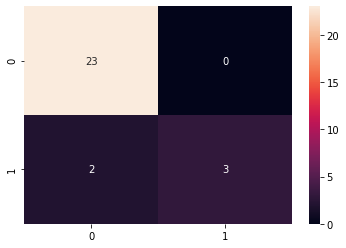

In [234]:
cm1= confusion_matrix(y1test, modely1.predict(x1test)) 


print(sns.heatmap(cm1, annot=True))


In [235]:
# Type_2_failure

modely2=RandomForestClassifier()
modely2.fit(x1train,y2train)

scorey2 = accuracy_score(y2test, modely2.predict(x1test))
print("Model : RandomForestClassifier ")
print('Accuracy : {:0.2f}'.format(scorey2))
model_list.append('RandomForestClassifier')
score_list.append(scorey2)
print('Recall_Score : {:0.2f}'.format(recall_score(y2test, modely2.predict(x1test))))
print('precission_Score : {:0.2f}'.format(precision_score(y2test, modely2.predict(x1test))))

Model : RandomForestClassifier 
Accuracy : 1.00
Recall_Score : 1.00
precission_Score : 1.00


AxesSubplot(0.125,0.125;0.62x0.755)


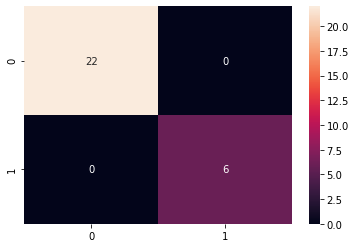

In [236]:
cm2= confusion_matrix(y2test, modely2.predict(x1test)) 
print(sns.heatmap(cm2, annot=True))




In [237]:
# Type_3_failure

modely3=RandomForestClassifier()
modely3.fit(x1train,y3train)

scorey3 = accuracy_score(y3test, modely3.predict(x1test))
print("Model : RandomForestClassifier ")
print('Accuracy : {:0.2f}'.format(scorey3))
model_list.append('RandomForestClassifier')
score_list.append(scorey3)
print('Recall_Score : {:0.2f}'.format(recall_score(y3test, modely3.predict(x1test))))
print('precission_Score : {:0.2f}'.format(precision_score(y3test, modely3.predict(x1test))))

Model : RandomForestClassifier 
Accuracy : 0.96
Recall_Score : 0.88
precission_Score : 1.00


AxesSubplot(0.125,0.125;0.62x0.755)


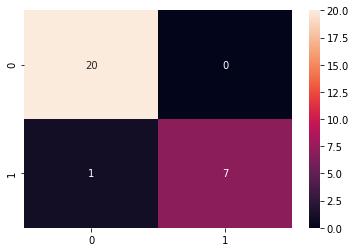

In [238]:

cm3= confusion_matrix(y3test, modely3.predict(x1test)) 
print(sns.heatmap(cm3, annot=True))





In [239]:
# Type_4_failure

modely4=RandomForestClassifier()
modely4.fit(x1train,y4train)

scorey4 = accuracy_score(y4test, modely4.predict(x1test))
print("Model : RandomForestClassifier ")
print('Accuracy : {:0.2f}'.format(scorey4))
model_list.append('RandomForestClassifier')
score_list.append(scorey4)
print('Recall_Score : {:0.2f}'.format(recall_score(y4test, modely4.predict(x1test))))
print('precission_Score : {:0.2f}'.format(precision_score(y4test, modely4.predict(x1test))))

Model : RandomForestClassifier 
Accuracy : 1.00
Recall_Score : 1.00
precission_Score : 1.00


AxesSubplot(0.125,0.125;0.62x0.755)


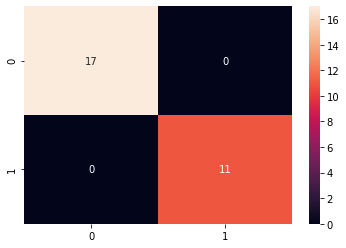

In [240]:
cm4= confusion_matrix(y4test, modely4.predict(x1test)) 
print(sns.heatmap(cm4, annot=True))




In [241]:
# Type_5_failure

modely5=RandomForestClassifier()
modely5.fit(x1train,y5train)

scorey5 = accuracy_score(y5test, modely5.predict(x1test))
print("Model : RandomForestClassifier ")
print('Accuracy : {:0.2f}'.format(scorey5))
model_list.append('RandomForestClassifier')
score_list.append(scorey5)
print('Recall_Score : {:0.2f}'.format(recall_score(y5test, modely5.predict(x1test))))
print('precission_Score : {:0.2f}'.format(precision_score(y5test, modely5.predict(x1test))))

Model : RandomForestClassifier 
Accuracy : 1.00
Recall_Score : 0.00
precission_Score : 0.00


AxesSubplot(0.125,0.125;0.62x0.755)


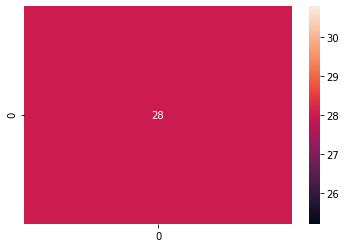

In [242]:
cm5= confusion_matrix(y5test, modely5.predict(x1test)) 

print(sns.heatmap(cm5, annot=True))



Perfect! Accuracy is almost 100% for all the type of failures

Done everything is ready. Let's start working on the provided test data 

  ## WORKING ON GIVEN TEST DATA

In [243]:
dftest=pd.read_csv("test_data_iitm.csv")
dftest

,UID,part_serial_no,type,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear
0,19954,L57133,L,298.1,307.8,1565,35.3,119
1,13851,M18710,M,302.3,311.0,1421,41.3,182
2,14963,M19822,M,304.0,312.7,1456,51.2,160
3,13887,L51066,L,302.4,311.3,1392,50.5,51
4,15438,M20297,M,302.9,312.6,1394,46.4,82
...,...,...,...,...,...,...,...,...
1995,13920,H33333,H,302.5,311.5,1655,32.3,142
1996,10163,L47342,L,298.3,308.1,1586,35.5,0
1997,17904,L55083,L,300.8,312.3,1435,44.8,134
1998,12243,L49422,L,299.2,308.4,1667,29.0,199


In [244]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaling_columns=[' ambient_temperature','process_temperature','rotational_speed','torque','tool_wear']


scaling_columns

dftest[scaling_columns].describe().loc[['min', 'max']]

scaler.fit(dftest[scaling_columns])

dftest[scaling_columns] = scaler.transform(dftest[scaling_columns])

dftest[scaling_columns].describe().loc[['min', 'max']]

dftest=pd.get_dummies(dftest, columns = ['type'])

dftest

,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M
0,19954,L57133,0.292135,0.240506,0.239590,0.435103,0.487705,0,1,0
1,13851,M18710,0.764045,0.645570,0.152686,0.523599,0.745902,0,0,1
2,14963,M19822,0.955056,0.860759,0.173808,0.669617,0.655738,0,0,1
3,13887,L51066,0.775281,0.683544,0.135184,0.659292,0.209016,0,1,0
4,15438,M20297,0.831461,0.848101,0.136391,0.598820,0.336066,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1995,13920,H33333,0.786517,0.708861,0.293905,0.390855,0.581967,1,0,0
1996,10163,L47342,0.314607,0.278481,0.252263,0.438053,0.000000,0,1,0
1997,17904,L55083,0.595506,0.810127,0.161135,0.575221,0.549180,0,1,0
1998,12243,L49422,0.415730,0.316456,0.301147,0.342183,0.815574,0,1,0


In [245]:
xt = dftest.drop({'UID','part_serial_no'}, axis= 1)

In [246]:
xt.head()

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M
0,0.292135,0.240506,0.239590,0.435103,0.487705,0,1,0
1,0.764045,0.645570,0.152686,0.523599,0.745902,0,0,1
2,0.955056,0.860759,0.173808,0.669617,0.655738,0,0,1
3,0.775281,0.683544,0.135184,0.659292,0.209016,0,1,0
4,0.831461,0.848101,0.136391,0.598820,0.336066,0,0,1


In [248]:
dftest['machine_failure']=model3.predict(xt)

In [249]:
dftest['machine_failure'].value_counts()

0    1940
1      60
Name: machine_failure, dtype: int64

In [250]:
dftest

,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M,machine_failure
0,19954,L57133,0.292135,0.240506,0.239590,0.435103,0.487705,0,1,0,0
1,13851,M18710,0.764045,0.645570,0.152686,0.523599,0.745902,0,0,1,0
2,14963,M19822,0.955056,0.860759,0.173808,0.669617,0.655738,0,0,1,0
3,13887,L51066,0.775281,0.683544,0.135184,0.659292,0.209016,0,1,0,0
4,15438,M20297,0.831461,0.848101,0.136391,0.598820,0.336066,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,13920,H33333,0.786517,0.708861,0.293905,0.390855,0.581967,1,0,0,0
1996,10163,L47342,0.314607,0.278481,0.252263,0.438053,0.000000,0,1,0,0
1997,17904,L55083,0.595506,0.810127,0.161135,0.575221,0.549180,0,1,0,0
1998,12243,L49422,0.415730,0.316456,0.301147,0.342183,0.815574,0,1,0,0


In [251]:
xt1=dftest[dftest['machine_failure']==1]

In [262]:
xt1

,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M,machine_failure
75,19015,M23874,0.191011,0.278481,0.103802,0.818584,0.848361,0,0,1,1
100,16526,L53705,0.629213,0.569620,0.086904,1.000000,0.200820,0,1,0,1
107,15398,M20257,0.820225,0.810127,0.149668,0.544248,0.987705,0,0,1,1
154,15049,H34462,0.955056,0.924051,0.062161,0.926254,0.659836,1,0,0,1
172,19940,H39353,0.314607,0.278481,0.885938,0.103245,0.344262,1,0,0,1
198,17760,L54939,0.550562,0.746835,0.062764,0.787611,0.811475,0,1,0,1
207,16160,L53339,0.617978,0.645570,0.139409,0.769912,0.778689,0,1,0,1
225,14212,L51391,0.741573,0.607595,0.088111,0.693215,0.032787,0,1,0,1
251,14545,L51724,0.786517,0.569620,0.109234,0.727139,0.766393,0,1,0,1
302,14643,L51822,0.865169,0.696203,0.042245,0.719764,0.926230,0,1,0,1


In [263]:
xt11=xt1.drop('machine_failure',axis=1)

In [264]:
xt1.reset_index()

,index,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M,machine_failure
0,75,19015,M23874,0.191011,0.278481,0.103802,0.818584,0.848361,0,0,1,1
1,100,16526,L53705,0.629213,0.569620,0.086904,1.000000,0.200820,0,1,0,1
2,107,15398,M20257,0.820225,0.810127,0.149668,0.544248,0.987705,0,0,1,1
3,154,15049,H34462,0.955056,0.924051,0.062161,0.926254,0.659836,1,0,0,1
4,172,19940,H39353,0.314607,0.278481,0.885938,0.103245,0.344262,1,0,0,1
5,198,17760,L54939,0.550562,0.746835,0.062764,0.787611,0.811475,0,1,0,1
6,207,16160,L53339,0.617978,0.645570,0.139409,0.769912,0.778689,0,1,0,1
7,225,14212,L51391,0.741573,0.607595,0.088111,0.693215,0.032787,0,1,0,1
8,251,14545,L51724,0.786517,0.569620,0.109234,0.727139,0.766393,0,1,0,1
9,302,14643,L51822,0.865169,0.696203,0.042245,0.719764,0.926230,0,1,0,1


In [265]:
xt11

,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M
75,19015,M23874,0.191011,0.278481,0.103802,0.818584,0.848361,0,0,1
100,16526,L53705,0.629213,0.569620,0.086904,1.000000,0.200820,0,1,0
107,15398,M20257,0.820225,0.810127,0.149668,0.544248,0.987705,0,0,1
154,15049,H34462,0.955056,0.924051,0.062161,0.926254,0.659836,1,0,0
172,19940,H39353,0.314607,0.278481,0.885938,0.103245,0.344262,1,0,0
198,17760,L54939,0.550562,0.746835,0.062764,0.787611,0.811475,0,1,0
207,16160,L53339,0.617978,0.645570,0.139409,0.769912,0.778689,0,1,0
225,14212,L51391,0.741573,0.607595,0.088111,0.693215,0.032787,0,1,0
251,14545,L51724,0.786517,0.569620,0.109234,0.727139,0.766393,0,1,0
302,14643,L51822,0.865169,0.696203,0.042245,0.719764,0.926230,0,1,0


In [266]:
xt11.drop({'UID','part_serial_no'},axis=1,inplace=True)

In [267]:
xt11

,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M
75,0.191011,0.278481,0.103802,0.818584,0.848361,0,0,1
100,0.629213,0.569620,0.086904,1.000000,0.200820,0,1,0
107,0.820225,0.810127,0.149668,0.544248,0.987705,0,0,1
154,0.955056,0.924051,0.062161,0.926254,0.659836,1,0,0
172,0.314607,0.278481,0.885938,0.103245,0.344262,1,0,0
198,0.550562,0.746835,0.062764,0.787611,0.811475,0,1,0
207,0.617978,0.645570,0.139409,0.769912,0.778689,0,1,0
225,0.741573,0.607595,0.088111,0.693215,0.032787,0,1,0
251,0.786517,0.569620,0.109234,0.727139,0.766393,0,1,0
302,0.865169,0.696203,0.042245,0.719764,0.926230,0,1,0


In [268]:
xt1['Type1_failure']=modely1.predict(xt11)

In [269]:
xtesty1

,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M,machine_failure,Type1_failure,Type2_failure,Type3_failure,Type4_failure,Type5_failure
75,19015,M23874,0.191011,0.278481,0.103802,0.818584,0.848361,0,0,1,1,0,0,1,1,0
100,16526,L53705,0.629213,0.569620,0.086904,1.000000,0.200820,0,1,0,1,0,0,1,0,0
107,15398,M20257,0.820225,0.810127,0.149668,0.544248,0.987705,0,0,1,1,1,0,0,0,0
154,15049,H34462,0.955056,0.924051,0.062161,0.926254,0.659836,1,0,0,1,0,0,1,0,0
172,19940,H39353,0.314607,0.278481,0.885938,0.103245,0.344262,1,0,0,1,0,0,1,0,0
198,17760,L54939,0.550562,0.746835,0.062764,0.787611,0.811475,0,1,0,1,0,0,0,1,0
225,14212,L51391,0.741573,0.607595,0.088111,0.693215,0.032787,0,1,0,1,0,1,0,0,0
251,14545,L51724,0.786517,0.569620,0.109234,0.727139,0.766393,0,1,0,1,0,0,0,1,0
302,14643,L51822,0.865169,0.696203,0.042245,0.719764,0.926230,0,1,0,1,0,1,0,1,0
321,10995,M15854,0.078652,0.164557,0.000000,0.849558,0.704918,0,0,1,1,0,0,1,0,0


In [271]:
xt1['Type1_failure'].value_counts()

0    59
1     1
Name: Type1_failure, dtype: int64

In [272]:
dftest['Type1_failure']=0

In [273]:
dftest['Type2_failure']=0
dftest['Type3_failure']=0
dftest['Type4_failure']=0
dftest['Type5_failure']=0

In [274]:
xt1['Type2_failure']=modely2.predict(xt11)
xt1['Type3_failure']=modely3.predict(xt11)
xt1['Type4_failure']=modely4.predict(xt11)
xt1['Type5_failure']=modely5.predict(xt11)

In [275]:
dftest[dftest['machine_failure']==1]=xt1

In [276]:
dftest['Type1_failure'].value_counts()

0    1999
1       1
Name: Type1_failure, dtype: int64

In [277]:
dftest['Type2_failure'].value_counts()

0    1989
1      11
Name: Type2_failure, dtype: int64

In [278]:
dftest['Type3_failure'].value_counts()

0    1973
1      27
Name: Type3_failure, dtype: int64

In [279]:
dftest['Type4_failure'].value_counts()

0    1975
1      25
Name: Type4_failure, dtype: int64

In [280]:
dftest['Type5_failure'].value_counts()

0    2000
Name: Type5_failure, dtype: int64

In [281]:
dftest

,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M,machine_failure,Type1_failure,Type2_failure,Type3_failure,Type4_failure,Type5_failure
0,19954,L57133,0.292135,0.240506,0.239590,0.435103,0.487705,0,1,0,0,0,0,0,0,0
1,13851,M18710,0.764045,0.645570,0.152686,0.523599,0.745902,0,0,1,0,0,0,0,0,0
2,14963,M19822,0.955056,0.860759,0.173808,0.669617,0.655738,0,0,1,0,0,0,0,0,0
3,13887,L51066,0.775281,0.683544,0.135184,0.659292,0.209016,0,1,0,0,0,0,0,0,0
4,15438,M20297,0.831461,0.848101,0.136391,0.598820,0.336066,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13920,H33333,0.786517,0.708861,0.293905,0.390855,0.581967,1,0,0,0,0,0,0,0,0
1996,10163,L47342,0.314607,0.278481,0.252263,0.438053,0.000000,0,1,0,0,0,0,0,0,0
1997,17904,L55083,0.595506,0.810127,0.161135,0.575221,0.549180,0,1,0,0,0,0,0,0,0
1998,12243,L49422,0.415730,0.316456,0.301147,0.342183,0.815574,0,1,0,0,0,0,0,0,0


In [282]:
testing=dftest[dftest['machine_failure']==1]
testing

,UID,part_serial_no,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M,machine_failure,Type1_failure,Type2_failure,Type3_failure,Type4_failure,Type5_failure
75,19015,M23874,0.191011,0.278481,0.103802,0.818584,0.848361,0,0,1,1,0,0,1,1,0
100,16526,L53705,0.629213,0.569620,0.086904,1.000000,0.200820,0,1,0,1,0,0,1,0,0
107,15398,M20257,0.820225,0.810127,0.149668,0.544248,0.987705,0,0,1,1,1,0,0,0,0
154,15049,H34462,0.955056,0.924051,0.062161,0.926254,0.659836,1,0,0,1,0,0,1,0,0
172,19940,H39353,0.314607,0.278481,0.885938,0.103245,0.344262,1,0,0,1,0,0,1,0,0
198,17760,L54939,0.550562,0.746835,0.062764,0.787611,0.811475,0,1,0,1,0,0,0,1,0
207,16160,L53339,0.617978,0.645570,0.139409,0.769912,0.778689,0,1,0,1,0,0,0,1,0
225,14212,L51391,0.741573,0.607595,0.088111,0.693215,0.032787,0,1,0,1,0,1,0,0,0
251,14545,L51724,0.786517,0.569620,0.109234,0.727139,0.766393,0,1,0,1,0,0,0,1,0
302,14643,L51822,0.865169,0.696203,0.042245,0.719764,0.926230,0,1,0,1,0,1,0,1,0


We can see that only 4 rows, which have machine failure, have two types of failures. Rest of all, there is only one type of failure due to which machine failure has occured.

In [292]:
ans=pd.read_csv("test_data_iitm.csv")
ans['machine_failure']=dftest['machine_failure']
ans['Type_1_fault']=dftest['Type1_failure']
ans['Type_2_fault']=dftest['Type2_failure']
ans['Type_3_fault']=dftest['Type3_failure']
ans['Type_4_fault']=dftest['Type4_failure']
ans['Type_5_fault']=dftest['Type5_failure']

In [293]:
ans

,UID,part_serial_no,type,ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,Type_1_fault,Type_2_fault,Type_3_fault,Type_4_fault,Type_5_fault
0,19954,L57133,L,298.1,307.8,1565,35.3,119,0,0,0,0,0,0
1,13851,M18710,M,302.3,311.0,1421,41.3,182,0,0,0,0,0,0
2,14963,M19822,M,304.0,312.7,1456,51.2,160,0,0,0,0,0,0
3,13887,L51066,L,302.4,311.3,1392,50.5,51,0,0,0,0,0,0
4,15438,M20297,M,302.9,312.6,1394,46.4,82,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,13920,H33333,H,302.5,311.5,1655,32.3,142,0,0,0,0,0,0
1996,10163,L47342,L,298.3,308.1,1586,35.5,0,0,0,0,0,0,0
1997,17904,L55083,L,300.8,312.3,1435,44.8,134,0,0,0,0,0,0
1998,12243,L49422,L,299.2,308.4,1667,29.0,199,0,0,0,0,0,0


In [294]:
ans.to_csv('CE17B104_ABHICHAND_predictions.csv')

In [284]:
ans

',UID,part_serial_no, ambient_temperature,process_temperature,rotational_speed,torque,tool_wear,type_H,type_L,type_M,machine_failure,Type1_failure,Type2_failure,Type3_failure,Type4_failure,Type5_failure\n0,19954,L57133,0.29213483146067176,0.2405063291139271,0.23958961979480986,0.4351032448377581,0.4877049180327869,0,1,0,0,0,0,0,0,0\n1,13851,M18710,0.7640449438202239,0.6455696202531627,0.15268557634278812,0.523598820058997,0.7459016393442623,0,0,1,0,0,0,0,0,0\n2,14963,M19822,0.9550561797752835,0.8607594936708836,0.17380808690404348,0.6696165191740413,0.6557377049180328,0,0,1,0,0,0,0,0,0\n3,13887,L51066,0.7752808988764031,0.6835443037974684,0.13518406759203383,0.6592920353982301,0.20901639344262296,0,1,0,0,0,0,0,0,0\n4,15438,M20297,0.8314606741572987,0.848101265822784,0.13639106819553404,0.5988200589970502,0.33606557377049184,0,0,1,0,0,0,0,0,0\n5,18518,M23377,0.31460674157303004,0.46835443037974755,0.18165359082679544,0.7227138643067846,0.7827868852459017,0,0,1,0,0,0,0,0,0\n6,12042,L4922